# Practica 1 - Análisis Exploratorio (EDA) de *Iris*

## 1. Setup

In [4]:
import seaborn as sns
import sys, pandas as pd, seaborn as sns, matplotlib as plt

print(sys.version)
print(pd.__version__, sns.__version__, matplotlib.__version__)
from pathlib import Path

3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]


NameError: name 'matplotlib' is not defined

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



## 2. 🪻 Iris (info)

El dataset Iris es un clásico de la clasificación supervisada, popularizado por R. A. Fisher. Su objetivo es predecir la especie de una flor a partir de medidas morfológicas. 

Contiene 150 observaciones divididas equitativamente en tres especies: *setosa, versicolor, virginica*, y cuatro variables numéricas medidas en centímetros: *sepal length, sepal width, petal length y petal width*. La variable objetivo es la especie. No presenta valores faltantes, y es conocido que setosa es linealmente separable, mientras que versicolor y virginica muestran mayor solapamiento.

Este conjunto se utiliza para EDA y modelos base por su tamaño compacto y balance de clases. 

> Asumimos muestras i.i.d. y mediciones consistentes en cm. 

Al modelar, es recomendable estandarizar si se emplean métodos basados en distancias y evaluar con matriz de confusión (especial atención a versicolor vs virginica). 

Fuentes de referencia: UCI Machine Learning Repository y Kaggle, donde se detalla la descripción de variables, unidades y descarga del dataset.

## 3. Preguntas de negocio
### Preguntas propias

1. ¿Cuál es la especie con pétalo más largo?
2. ¿Hay alguna relación con el largo del sepal y el del pétalo?
3. ¿Cuál es la especie con promedio de sepal más ancho?

# 4. Carga de datos


In [ ]:
df_sns = sns.load_dataset('iris')
df_sns.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris(as_frame=True)
df_sklearn = data.frame
df_sklearn.rename(columns={'target': 'species'}, inplace=True)
df_sklearn.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
if df.equals(df_sns):
  print("Las bases 1 y 2 son iguales")
else:
  print("Las bases 1 y 2 son distintas")

if df_sklearn.equals(df_sns):
  print("Las bases 2 y 3 son iguales")
else:
  print("Las bases 2 y 3 son distintas")

Las bases 1 y 2 son iguales
Las bases 2 y 3 son distintas


## 5. Chequeos básicos y data dictionary

In [ ]:
df.shape, df.dtypes, df.isna().sum()
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.199333,0.762238,0.1,0.3,1.3,1.8,2.5
species,150,3,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_sns.shape, df_sns.dtypes, df_sns.isna().sum()
display(df_sns.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.199333,0.762238,0.1,0.3,1.3,1.8,2.5
species,150,3,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_sklearn.shape, df_sklearn.dtypes, df_sklearn.isna().sum()
display(df_sklearn.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [ ]:
from pandas.api.types import is_string_dtype

if is_string_dtype(df['species']):
    df['species'] = df['species'].astype('category')


desc = df.describe()
corr = df.select_dtypes('number').corr()
print(desc); print(corr)


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


In [ ]:
# Crear carpetas necesarias
base_dir = Path("results")
perfil_dir = base_dir / "perfiles"
plot_dir = base_dir / "visualizaciones"
perfil_dir.mkdir(parents=True, exist_ok=True)
plot_dir.mkdir(parents=True, exist_ok=True)

# 6. Plausibilidad y Rangos



In [7]:
import numpy as np

# Definir rangos esperados manualmente
rangos_esperados = {
    'sepal_length': (4.0, 8.0),
    'sepal_width': (2.0, 4.5),
    'petal_length': (1.0, 7.0),
    'petal_width': (0.1, 2.5),
}

resultados = []

for col, (rmin, rmax) in rangos_esperados.items():
    serie = df[col]
    obs_min = serie.min()
    obs_max = serie.max()
    pct_missing = serie.isna().mean() * 100
    flag = serie.between(rmin, rmax).all()
    resultados.append({
        'feature': col,
        'unidad': 'cm',
        'tipo': 'numérico',
        'rango_esperado': f'{rmin}–{rmax}',
        '%missing': round(pct_missing, 2),
        'obs_min': obs_min,
        'obs_max': obs_max,
        'flag': flag
    })

plaus_df = pd.DataFrame(resultados)
print(plaus_df)


        feature unidad      tipo rango_esperado  %missing  obs_min  obs_max  \
0  sepal_length     cm  numérico        4.0–8.0       0.0      4.3      7.9   
1   sepal_width     cm  numérico        2.0–4.5       0.0      2.0      4.4   
2  petal_length     cm  numérico        1.0–7.0       0.0      1.0      6.9   
3   petal_width     cm  numérico        0.1–2.5       0.0      0.1      2.5   

   flag  
0  True  
1  True  
2  True  
3  True  


# 7. Análisis Estadístico

In [ ]:
# Estadísticas descriptivas
desc = df.describe()
print("Estadísticas Descriptivas:\n")
print(desc)

# Correlación de Pearson
corr_pearson = df.select_dtypes('number').corr(method='pearson')
print("\nCorrelación de Pearson:\n")
print(corr_pearson)

# Correlación de Spearman
corr_spearman = df.select_dtypes('number').corr(method='spearman')
print("\nCorrelación de Spearman:\n")   
print(corr_spearman)

# Skewness y kurtosis
skew_kurt = df.select_dtypes('number').agg(['skew', 'kurtosis'])
print("\nAsimetría (Skew) y Curtosis:\n")
print(skew_kurt)

# Matriz de covarianza
cov = df.select_dtypes('number').cov()
print("\nMatriz de Covarianza:\n")
print(cov)

# Duplicados
num_duplicados = df.duplicated().sum()

print(f"Número de filas duplicadas: {num_duplicados}")



Estadísticas Descriptivas:

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Correlación de Pearson:

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

Correlación de Spearman:

              sepal_length  sepal_width  pet

# 8. Visualizaciones

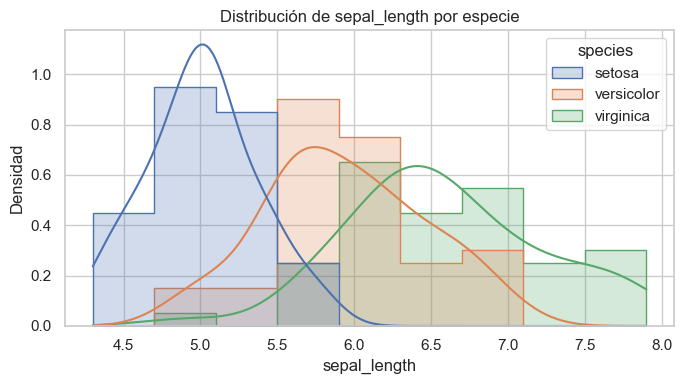

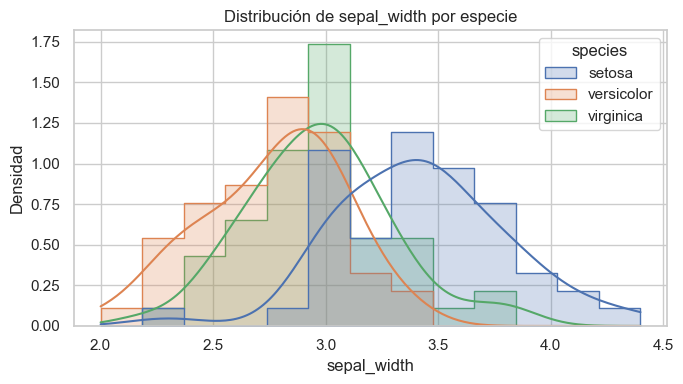

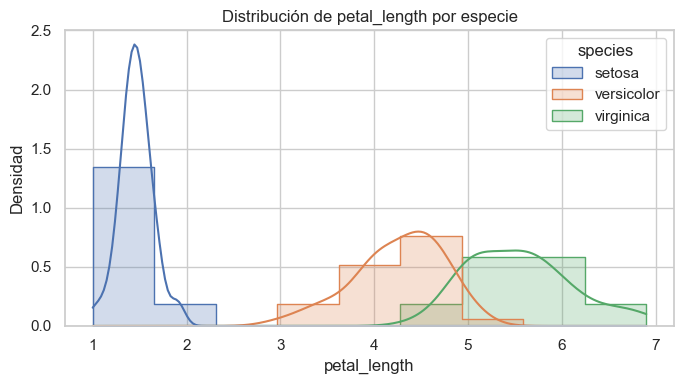

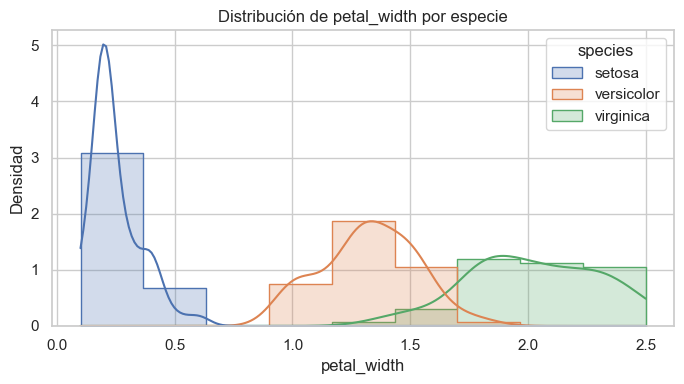

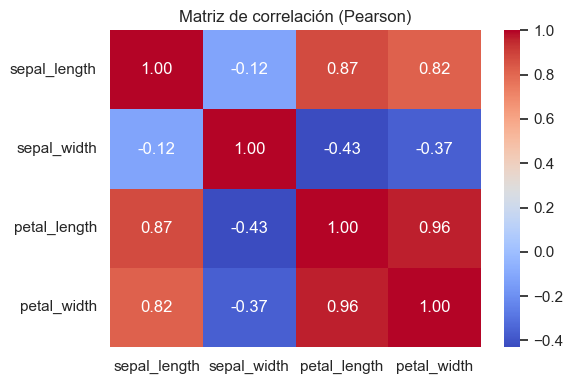

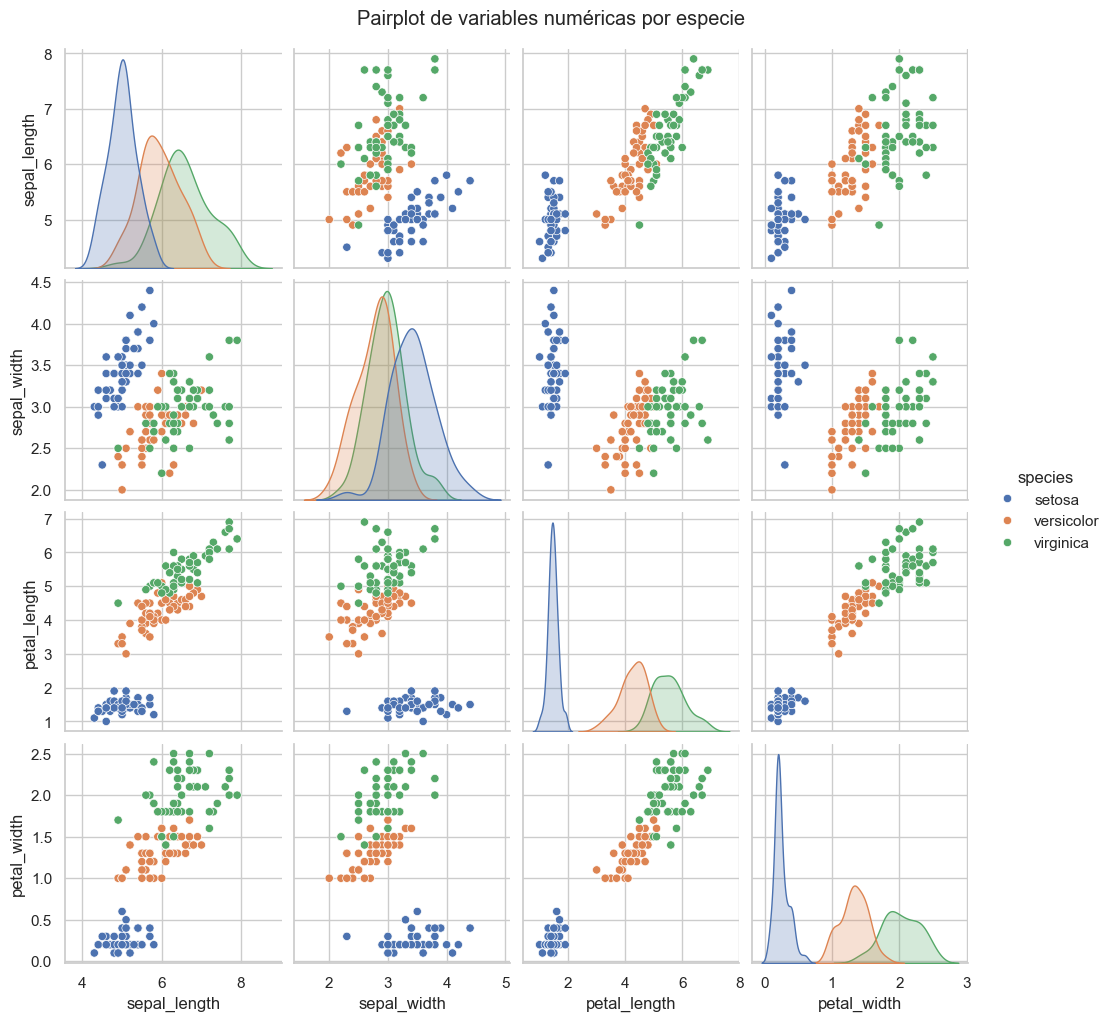

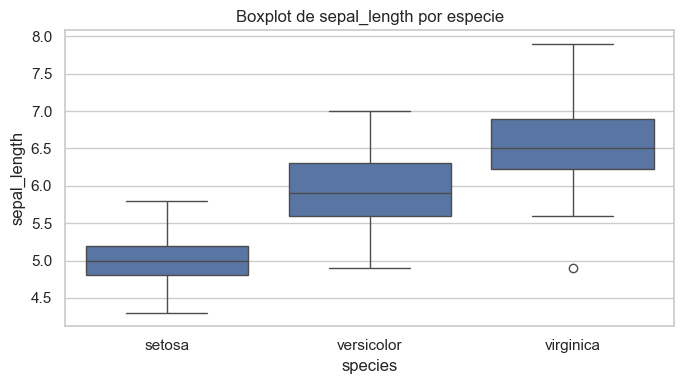

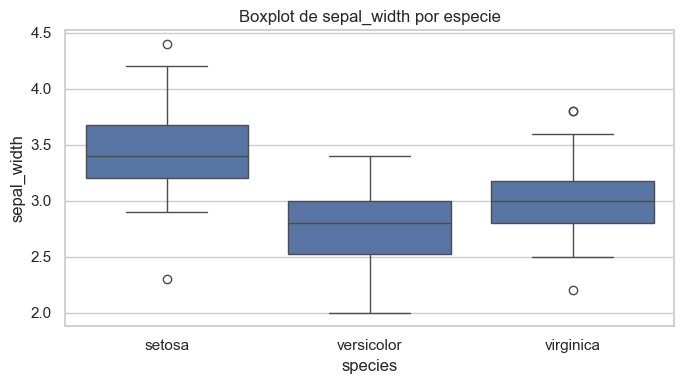

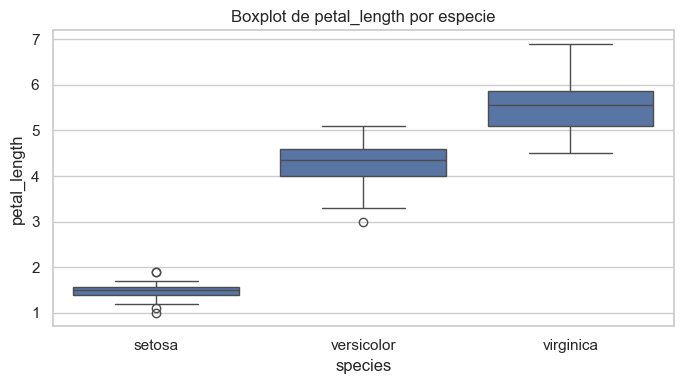

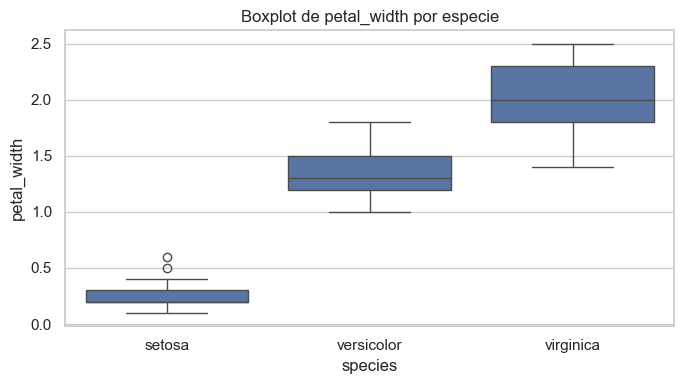

No hay valores faltantes en el dataset.


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
for col in df.select_dtypes('number').columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=col, hue='species', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {col} por especie')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(6, 4))
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación (Pearson)')
plt.tight_layout()
plt.show()


sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Pairplot de variables numéricas por especie', y=1.02)
plt.show()


for col in df.select_dtypes('number').columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x='species', y=col)
    plt.title(f'Boxplot de {col} por especie')
    plt.tight_layout()
    plt.show()

missing_pct = df.isna().mean().sort_values(ascending=False)
if missing_pct.sum() > 0:
    plt.figure(figsize=(7, 4))
    sns.barplot(x=missing_pct.index, y=missing_pct.values)
    plt.title('Proporción de valores faltantes por columna')
    plt.ylabel('% missing')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores faltantes en el dataset.")


# 9. Diccionario de Datos

In [ ]:
data_dict = pd.DataFrame([
    {"nombre": "sepal_length", "tipo": "float", "unidad": "cm", "descripción": "Longitud del sépalo", "notas": ""},
    {"nombre": "sepal_width", "tipo": "float", "unidad": "cm", "descripción": "Ancho del sépalo", "notas": ""},
    {"nombre": "petal_length", "tipo": "float", "unidad": "cm", "descripción": "Longitud del pétalo", "notas": ""},
    {"nombre": "petal_width", "tipo": "float", "unidad": "cm", "descripción": "Ancho del pétalo", "notas": ""},
    {"nombre": "species", "tipo": "categorical", "unidad": "-", "descripción": "Especie de la flor", "notas": "Iris-setosa, versicolor, virginica"},
])
data_dict.to_markdown(base_dir / 'reportes' / 'data_dictionary.md', index=False)
